In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [ ]:
from google.colab import files
uploaded = files.upload()



Saving seller_enrollment_dataset_25k.csv to seller_enrollment_dataset_25k.csv


In [ ]:

df = pd.read_csv('seller_enrollment_dataset_25k.csv')





In [ ]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   seller_id             25000 non-null  object 
 1   platform              25000 non-null  object 
 2   category              25000 non-null  object 
 3   kind                  25000 non-null  object 
 4   region                25000 non-null  object 
 5   impressions           25000 non-null  int64  
 6   clicks                25000 non-null  int64  
 7   enrolled              25000 non-null  int64  
 8   risk_rating           25000 non-null  float64
 9   manual_file_ingested  25000 non-null  object 
 10  optin_cta_tagged      25000 non-null  object 
 11  impression_tag_valid  25000 non-null  object 
 12  click_date            25000 non-null  object 
 13  enrollment_date       15813 non-null  object 
 14  product_opted         25000 non-null  object 
 15  campaign_id        

,seller_id,platform,category,kind,region,impressions,clicks,enrolled,risk_rating,manual_file_ingested,optin_cta_tagged,impression_tag_valid,click_date,enrollment_date,product_opted,campaign_id,seller_tenure_months,conversion_rate
0,SELL10000,Web,Fashion,Individual,North,4,0,0,3.71,Yes,No,Yes,2025-04-17,NaN,Stored Value,CMP195,14,0.00
1,SELL10001,Mobile Web,Fashion,Enterprise,West,8,8,1,1.88,No,Yes,Yes,2025-02-15,2025-04-08,One-Time Fee,CMP532,22,1.00
2,SELL10002,App,Electronics,Individual,West,9,2,1,1.39,No,No,Yes,2025-04-17,2025-02-20,One-Time Fee,CMP570,35,0.22
3,SELL10003,App,Toys,Small Business,South,4,3,1,3.82,Yes,Yes,No,2025-04-03,2025-03-28,Stored Value,CMP975,15,0.75
4,SELL10004,Mobile Web,Home,Individual,East,4,3,1,2.42,No,Yes,Yes,2025-03-08,2025-04-04,One-Time Fee,CMP846,16,0.75


In [ ]:
# Standardize tag fields
df['optin_cta_tagged'] = df['optin_cta_tagged'].fillna('No').str.strip().str.lower()
df['impression_tag_valid'] = df['impression_tag_valid'].fillna('No').str.strip().str.lower()

# Optional: Convert 'Yes'/'No' to boolean
df['manual_file_ingested'] = df['manual_file_ingested'].map({'Yes': True, 'No': False})


In [ ]:
funnel_df = df.groupby(['platform', 'category', 'kind', 'manual_file_ingested']).agg({
    'impressions': 'sum',
    'clicks': 'sum',
    'enrolled': 'sum'
}).reset_index()

# Calculate drop-offs
funnel_df['click_rate'] = funnel_df['clicks'] / funnel_df['impressions']
funnel_df['enroll_rate'] = funnel_df['enrolled'] / funnel_df['clicks']


In [ ]:

px.bar(funnel_df, x='platform', y='click_rate', color='manual_file_ingested', title="Click Rate by Platform")


In [ ]:
tag_issues = df.groupby(['optin_cta_tagged', 'impression_tag_valid']).agg({
    'clicks': 'sum',
    'enrolled': 'sum'
}).reset_index()

# Calculate Conversion
tag_issues['conversion_rate'] = tag_issues['enrolled'] / tag_issues['clicks']


In [ ]:
# Convert categorical tag fields
df['optin_cta_tagged_bool'] = df['optin_cta_tagged'] == 'yes'
df['impression_tag_valid_bool'] = df['impression_tag_valid'] == 'yes'

df[['optin_cta_tagged_bool', 'impression_tag_valid_bool', 'enrolled']].corr()


,optin_cta_tagged_bool,impression_tag_valid_bool,enrolled
optin_cta_tagged_bool,1.000000,0.007115,0.002064
impression_tag_valid_bool,0.007115,1.000000,-0.005716
enrolled,0.002064,-0.005716,1.000000


from matplotlib import pyplot as plt
_df_0['optin_cta_tagged_bool'].plot(kind='hist', bins=20, title='optin_cta_tagged_bool')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['impression_tag_valid_bool'].plot(kind='hist', bins=20, title='impression_tag_valid_bool')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['enrolled'].plot(kind='hist', bins=20, title='enrolled')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='optin_cta_tagged_bool', y='impression_tag_valid_bool', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='impression_tag_valid_bool', y='enrolled', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['optin_cta_tagged_bool'].plot(kind='line', figsize=(8, 4), title='optin_cta_tagged_bool')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['impression_tag_valid_bool'].plot(kind='line', figsize=(8, 4), title='impression_tag_valid_bool')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['enrolled'].plot(kind='line', figsize=(8, 4), title='enrolled')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Clean up values: remove underscores, trim spaces, and make lowercase
df['optin_cta_tagged'] = df['optin_cta_tagged'].str.replace('_', '', regex=False).str.strip().str.lower()
df['impression_tag_valid'] = df['impression_tag_valid'].str.replace('_', '', regex=False).str.strip().str.lower()


In [ ]:
tag_issues = df.groupby(['optin_cta_tagged', 'impression_tag_valid']).agg({
    'clicks': 'sum',
    'enrolled': 'sum'
}).reset_index()

# Calculate Conversion
tag_issues['conversion_rate'] = tag_issues['enrolled'] / tag_issues['clicks']


In [ ]:
# Convert categorical tag fields
df['optin_cta_tagged_bool'] = df['optin_cta_tagged'] == 'yes'
df['impression_tag_valid_bool'] = df['impression_tag_valid'] == 'yes'

df[['optin_cta_tagged_bool', 'impression_tag_valid_bool', 'enrolled']].corr()


,optin_cta_tagged_bool,impression_tag_valid_bool,enrolled
optin_cta_tagged_bool,1.000000,0.007115,0.002064
impression_tag_valid_bool,0.007115,1.000000,-0.005716
enrolled,0.002064,-0.005716,1.000000


<Axes: xlabel='enrolled', ylabel='seller_tenure_months'>

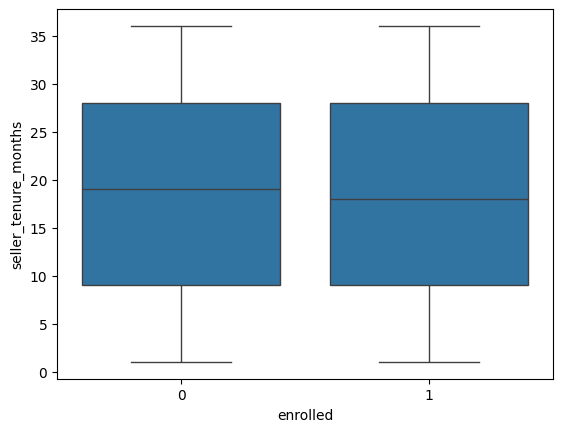

In [ ]:
sns.boxplot(data=df, x='enrolled', y='seller_tenure_months')


<Axes: xlabel='enrolled', ylabel='risk_rating'>

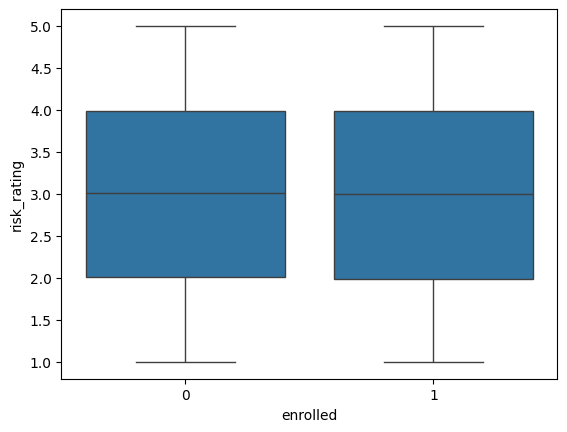

In [ ]:
sns.boxplot(data=df, x='enrolled', y='risk_rating')


<Axes: xlabel='product_opted'>

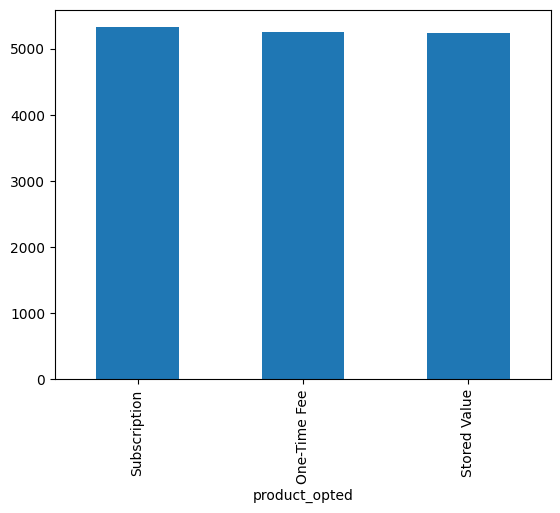

In [ ]:
df[df['enrolled'] == 1]['product_opted'].value_counts().head(10).plot(kind='bar')


In [ ]:
# Clean up values: remove underscores, trim spaces, and make lowercase
df['optin_cta_tagged'] = df['optin_cta_tagged'].str.replace('_', '', regex=False).str.strip().str.lower()
df['impression_tag_valid'] = df['impression_tag_valid'].str.replace('_', '', regex=False).str.strip().str.lower()


In [ ]:
df.to_csv('cleaned_seller_enrollment_dataset_25k.csv', index=False)


In [ ]:
# Save cleaned DataFrame to a CSV file
df.to_csv('cleaned_seller_data.csv', index=False)


In [ ]:
from google.colab import files
files.download('cleaned_seller_data.csv')

